<a href="https://colab.research.google.com/github/vongmaianh170196/statistical_data_analysis_utu/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr, chi2_contingency, shapiro, mannwhitneyu, spearmanr

**Data preparation**

1. Load the data and check if variables match the documentation

2. Modify data
  
   Filter invalid value according to the logic listed in the table below:
      <table>
        <tr>
          <th><p>Variable</p> </th>
          <th></th>
          <th><p>Condition of invalid value</p> </th>
        </tr>
        <tr>
          <td><p>Ticket</p> </td>
          <td></td>
          <td><p>Ticket type is not 'single', or 'season', or  'savonia'</p> </td>
        </tr>
        <tr>
          <td><p> Cost</p> </td>
          <td></td>
          <td>
            <p>Value is less than 0.</p>           
            <p>Value equals to 0 is acceptable in this analysis as there cases the distance and the duration of use is too little to charge or the user has discount from the coupon</p> </td>
        </tr>
        <tr>
          <td><p>Month</p></td>
          <td></td>
          <td><p>Month values has to be within the range from 1 to 12</p> </td>
        </tr>
        <tr>
          <td>
          <p>Location from</p>
          <p> Location to</p>
          </td>
          <td></td>
          <td><p>Null or empty string</p></td>
        </tr>
        <tr>
          <td>
          <p>Duration</p>
          <p>Distance</p>
          <p>Energy used</p>
          <p>Energy collected</p>
          </td>
          <td></td>
          <td>
          <p>Value is less than 0</p>
          </td>
        </tr>
        <tr>
          <td><p>Assistance</p></td>
          <td></td>
          <td><p>Value is neither 1 nor 0</p></td>
        </tr>
      </table>
  

In [24]:
df = pd.read_csv("bikes.data")

expected_columns = [
    "ticket", "cost", "month", "location_from", "location_to",
    "duration", "distance", "assistance", "energy_used", "energy_collected"
]

if df.columns.tolist() == expected_columns:
    print("Variables match the documentation.")
else:
    print("Variables do not match the documentation.")

def filter_and_count_invalid(data):
    invalid_counts = {}

    # Filter ticket column
    valid_tickets = ['single', 'season', 'savonia']
    invalid_tickets = data[~data['ticket'].isin(valid_tickets)]
    invalid_counts["ticket"] = len(invalid_tickets)
    data.loc[invalid_tickets.index, 'ticket'] = np.nan

    # Filter cost column
    invalid_costs = data[data['cost'] < 0]
    invalid_counts["cost"] = len(invalid_costs)
    data.loc[invalid_costs.index, 'cost'] = np.nan

    # Filter month column
    invalid_months = data[~data['month'].between(1, 12)]
    invalid_counts["month"] = len(invalid_months)
    data.loc[invalid_months.index, 'month'] = np.nan

    # Filter duration column
    invalid_durations = data[data['duration'] < 0]
    invalid_counts["duration"] = len(invalid_durations)
    data.loc[invalid_durations.index, 'duration'] = np.nan

    # Filter distance column
    invalid_distances = data[data['distance'] < 0]
    invalid_counts["distance"] = len(invalid_distances)
    data.loc[invalid_distances.index, 'distance'] = np.nan

    # Filter location_from column
    invalid_location_from = data[data['location_from'].isnull() | (data['location_from'] == "")]
    invalid_counts["location_from"] = len(invalid_location_from)
    data.loc[invalid_location_from.index, 'location_from'] = np.nan

    # Filter location_to column
    invalid_location_to = data[data['location_to'].isnull() | (data['location_to'] == "")]
    invalid_counts["location_to"] = len(invalid_location_to)
    data.loc[invalid_location_to.index, 'location_to'] = np.nan

    # Filter assistance column
    valid_assistance = [0, 1]
    invalid_assistance = data[~data['assistance'].isin(valid_assistance)]
    invalid_counts["assistance"] = len(invalid_assistance)
    data.loc[invalid_assistance.index, 'assistance'] = np.nan

    # Filter energy_used column
    invalid_energy_used = data[data['energy_used'] < 0]
    invalid_counts["energy_used"] = len(invalid_energy_used)
    data.loc[invalid_energy_used.index, 'energy_used'] = np.nan

    # Filter energy_collected column
    invalid_energy_collected = data[data['energy_collected'] < 0]
    invalid_counts["energy_collected"] = len(invalid_energy_collected)
    data.loc[invalid_energy_collected.index, 'energy_collected'] = np.nan

    data = data.dropna()
    return data, invalid_counts

bikes_data, invalid_counts = filter_and_count_invalid(df)

# Check which column has invalid data and how many rows it has
for column, count in invalid_counts.items():
    if count > 0:
      print(f"Column: {column} has {count} invalid values")


Variables match the documentation.
Column: distance has 39 invalid values


In [33]:
# Data Exploration
# Describe the data
data_description = bikes_data.describe()
print(data_description)

              cost        month      duration      distance   assistance  \
count  1735.000000  1735.000000   1735.000000   1735.000000  1735.000000   
mean      0.499597     7.223631    681.594236   2522.847262     0.914697   
std       4.173056     1.709805   1152.022110   2338.679540     0.279412   
min       0.000000     4.000000      2.000000      0.000000     0.000000   
25%       0.000000     6.000000    254.000000    930.000000     1.000000   
50%       0.050000     7.000000    556.000000   2050.000000     1.000000   
75%       0.550000     9.000000    887.000000   3670.000000     1.000000   
max     100.000000    10.000000  25614.000000  20770.000000     1.000000   

       energy_used  energy_collected  
count  1735.000000       1735.000000  
mean     17.783228          5.765879  
std      17.192545          6.394153  
min       0.000000          0.000000  
25%       2.650000          0.600000  
50%      14.800000          4.200000  
75%      27.250000          8.400000  
max

**Data preparation**
3. Data summary:

  The table above describes the total valid values, the mean, standard deviation, minumum, maximum, 25th percentile, 50th percentile and 75th percentile of the data in each columns.

  - **Cost**: The mean value is approximately 0.50 euros, with a standard deviation of 4.17. The minimum value is 0, while the maximum is 100.
  - **Month**: The bikes are mostly rented from April ro October, with the mean month being around 7.22. The standard deviation indicates that most of the data is within 1-2 months of the mean.
  - **Duration**: The average trip duration is approximately 681.59 seconds, with a standard deviation of 1152.02 seconds. The minimum duration is 2 seconds, while the maximum is 25614 seconds.
  - **Distance**: The mean value is roughly 2522.85 meters, with a standard deviation of 2338.68 meters which indicates a high variation.
  - **Assistance** The average usage of electric assistance is approximately 0.91, which indicates it is widely used in most of the trips.
  - **Energy Used and Energy Collected**: The mean energy used and energy collected during a trip are approximately 17.78 and 5.77 watt-hours, respectively. There is a considerable variation in energy usage and collection, as the maximum values being 144.9 and 56.4 watt-hours and the standard deviation is 17,19 and 6.39, respectively.

**Data preparation**
4. Visualization:

  The charts above visualize the mean value of duration, distance, energy used, energy collected and the cost monthly. Gnerally, the bikes are used mostly during August and September and least used in April.

  - Figure 1 shows that the longest duration of bike rental is in September and the shortest is in April which indicates the usage varies seasonally and based on the weather condition.
  - Similarly, Figure 2, 3, 4 indicate that the bike rental is used for long distance during August.
  - Lastly Figure 3 shows that the cost of bike rental is highest in September but drastically decreased in October


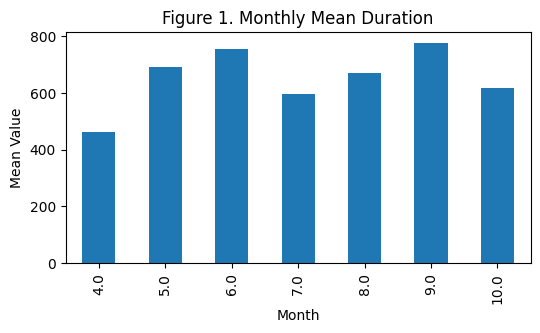

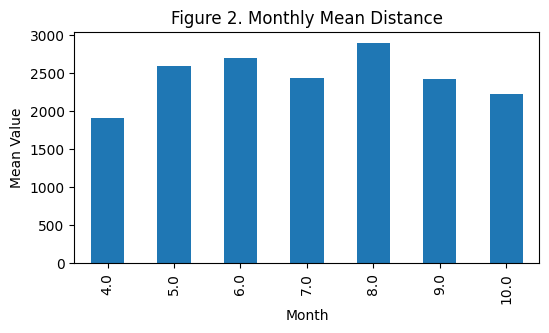

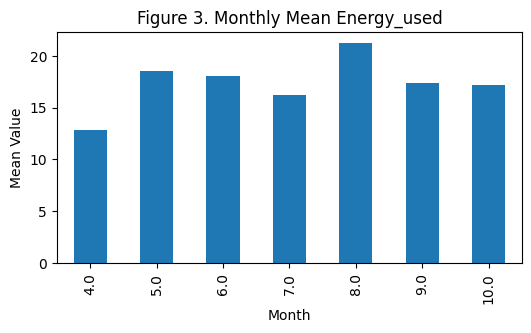

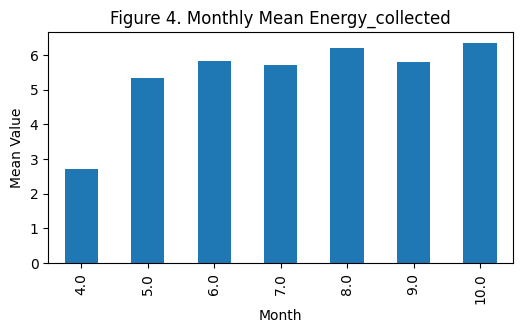

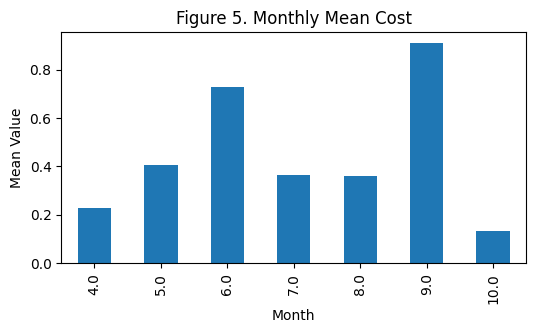

In [34]:
# Data Exploration
# Visualizations
# Converting values to universal units duration (minutes), energy_used (kWh), energy_collected (kWh), distance (km)
data_description['duration'] /= 60
data_description['energy_used'] /= 1000
data_description['energy_collected'] /= 1000
data_description['distance'] /= 1000

metrics = ['duration', 'distance', 'energy_used', 'energy_collected', 'cost']
monthly_means = bikes_data.groupby('month')[metrics].mean()

# Creating bar chart for each metric
for index, metric in enumerate(metrics):
    plt.figure(figsize=(6, 3))
    monthly_means[metric].plot.bar()
    plt.title(f'Figure {index + 1}. Monthly Mean {metric.capitalize()}')
    plt.xlabel('Month')
    plt.ylabel('Mean Value')
    plt.show()

**Data exploration**

  **1. Analysis for Marketing team**

In [42]:

# Data Exploration
# For each ticket type, calculate the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid. Examine your results and make comments about the customers.

print("Below are the calculation for number of trips, total travelled distance, duration and cost per ticket type:\n")
ticket_types = ['single', 'season', 'savonia']
for ticket_type in ticket_types:
    subset = bikes_data[bikes_data['ticket'] == ticket_type]
    num_trips = len(subset)
    total_distance = subset['distance'].sum()
    total_time = subset['duration'].sum()
    total_fees = subset['cost'].sum()
    print(f"Ticket type: {ticket_type.capitalize()}")
    print(f"Number of trip: {num_trips}")
    print(f"Total travelled distance: {total_distance} km")
    print(f"Total travelled time: {total_time} minutes")
    print(f"Total fees paid: {total_fees} euros")
    print()



Below are the calculation for number of trips, total travelled distance, duration and cost per ticket type:

Ticket type: Single
Number of trip: 945
Total travelled distance: 2566300.0 km
Total travelled time: 667446.0 minutes
Total fees paid: 661.8 euros

Ticket type: Season
Number of trip: 541
Total travelled distance: 1311590.0 km
Total travelled time: 323291.0 minutes
Total fees paid: 3.0 euros

Ticket type: Savonia
Number of trip: 249
Total travelled distance: 499250.0 km
Total travelled time: 191829.0 minutes
Total fees paid: 202.0 euros



Customers used single ticket types in most of the trips as the total amount of trips is the highest compared to other season and savonia ticket type. The fees collected from them amount to 661.8 euros with a total distance of 2566300.0km.

Followed by season ticket holders with moderate number of trips and cover a substantial distance. However, the fees paid from them are the lowest with only 3 euros in total. This indicates the benefits that a subcription or package deal in terms of cost-saving.

Lastly, Savonia ticket holders have the lowest number of trips with the shortest distance of 499250km in total. This indicate an occasional use of this ticket type as the fees paid is still relatively high with 202euros in total.

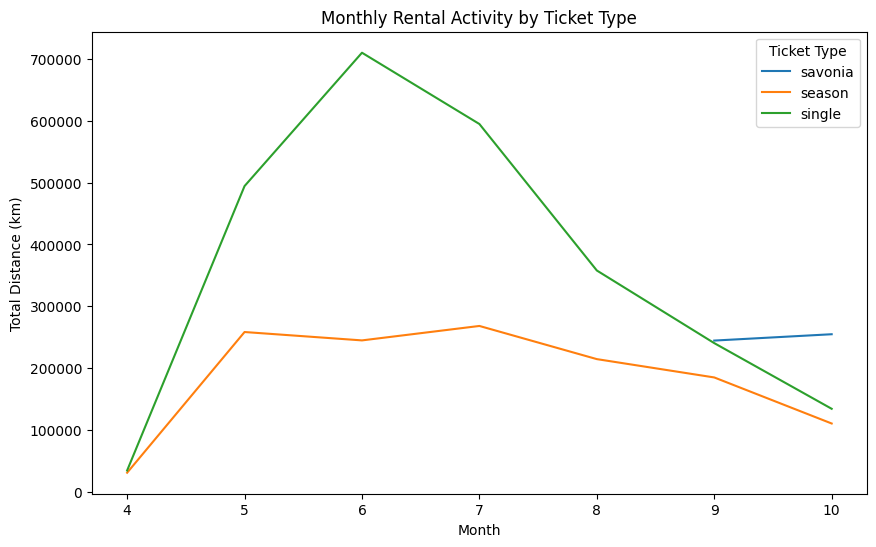

In [44]:
# Data Exploration
# For each ticket type, visualise the monthly rental activity in terms of the total distance travelled
monthly_activity = bikes_data.groupby(['month', 'ticket'])['distance'].sum().unstack().plot(kind='line', figsize=(10, 6))
plt.title('Monthly Rental Activity by Ticket Type')
plt.xlabel('Month')
plt.ylabel('Total Distance (km)')
plt.legend(title='Ticket Type', loc='upper right')
plt.show()
monthly_activity = bikes_data.groupby(['month', 'ticket'])['distance'].sum().unstack()


The chart depicts the monthly rental trends categorized by ticket type. Generally, the chart indicates an increase in rental activity for both the "single" and "season" ticket types during the spring and early summer.

Data for the "single" ticket type shows a consistent rise in total distance from April to June starting from 34,290.0 km in April and steadily climbed to 710,240.0 km in June. Although there was a slight drop in July and August, the total distance covered by "single" tickets remained relatively substantial. The distance covered then decreased in September and October, but still remained at higher value than the April.

Similar result for the "season" ticket type, though the increase was not as sharp as that for the "single" ticket type. A steady progression during the spring and early summer months with 30,680.0 km in April and reached 268,150.0 km in July. There was also a decrease in total distance covered in August and continued to decline in September and October but remained higher than the April figures.

Conversely, the data for the "savonia" ticket type was not well-presented. The reason behind that could be due to the data. However the rental activity happens mostly in September and October although not as significant as that of the "single" and "season" ticket types.


**Data exploration**

  **2. Analysis for Logistics team**

In [47]:
# Data Exploration
# Find the three stations that have the highest total deficit of bikes (i.e. the largest negative difference between the number of arrived bikes and the number of departured bikes) and the three stations that have the highest total surplus of bikes (i.e. the largest positive difference)
departure_counts = bikes_data['location_from'].value_counts()
arrival_counts = bikes_data['location_to'].value_counts()
departure_arrivals_difference = arrival_counts - departure_counts
deficit_stations = departure_arrivals_difference.nsmallest(3)
surplus_stations = departure_arrivals_difference.nlargest(3)
print("Top 3 stations with highest deficit of bikes:")
print(deficit_stations)
print()
print("Top 3 stations with highest surplus of bikes:")
print(surplus_stations)


Top 3 stations with highest deficit of bikes:
SATAMA   -38
KYS      -17
TORI     -16
dtype: int64

Top 3 stations with highest surplus of bikes:
KAUPPAKATU        46
PUIJONLAAKSO      29
TASAVALLANKATU    12
dtype: int64


Top 3 Stations with Highest Deficit of Bikes:

- KAUPPAKATU with a deficit of 46 bikes.
- PUIJONLAAKSO with a deficit of 29 bikes.
- TASAVALLANKATU with a deficit of 12 bikes.

**Suggestion:** Bikes from stations or nearby stations with a surplus should be relocated to these stations to address the deficit. Frequent observation also helps with detecting early enough bike demands in certain time of the day.

Top 3 Stations with Highest Surplus of Bikes:

- SATAMA with a surplus of 38 bikes.
- KYS with a surplus of 17 bikes.
- TORI with a surplus of 16 bikes.

**Suggestion:** Bikes from surplus stations can be relocated to stations with deficits to balance the bike distribution. Based on the list of stations that have deficits of bikes, condering any of the distribution of any of these stations towards the above mentioned stations. A better bike monitoring system is essential to balance the deficit and surplus of bike distribution.


<ipython-input-48-ad0efcecf1c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_data.loc[:, 'energy_gain'] = bikes_data['energy_collected'] - bikes_data['energy_used']


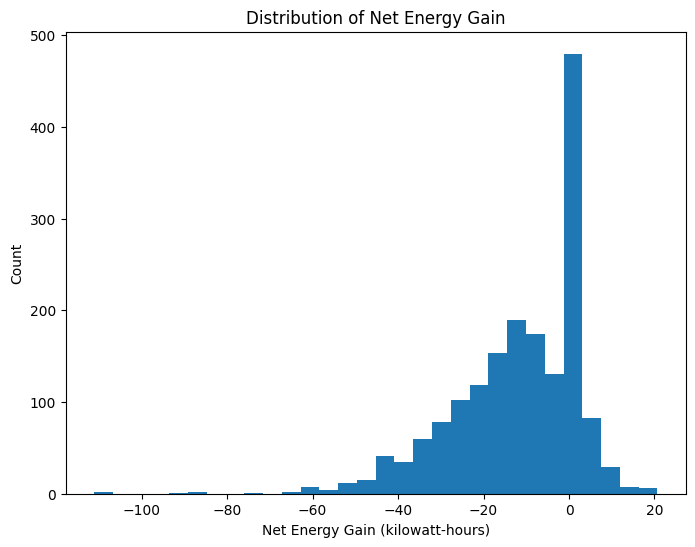

In [48]:
#  For each trip in the data set, calculate its net energy gain, which is defined as the difference between the energy collected and consumed during a trip
bikes_data.loc[:, 'energy_gain'] = bikes_data['energy_collected'] - bikes_data['energy_used']

plt.figure(figsize=(8, 6))
bikes_data['energy_gain'].plot.hist(bins=30)
plt.title('Distribution of Net Energy Gain')
plt.xlabel('Net Energy Gain (kilowatt-hours)')
plt.ylabel('Count')
plt.show()


"""
There is a considerable number of trips with net energy gain value of 0, which indicates that in a substantional portion of trips, there is a relative balance between energy consumption and energy collected.
However there is a noticable difference between the number of energy loss and energy gain.
There are more trips that the energy was consumed than collected, which means the distribution of energy is not efficient enough.
More enegery-efficiency strageteries should be deveopedfor specific bike trips as well as the potential areas for energy consumption and collection.
"""

In [ ]:

# Hypothesis Testing
# Hypothesis 1:  Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type

single_ticket_duration = bikes_data[bikes_data['ticket'] == 'single']['duration']
season_ticket_duration = bikes_data[bikes_data['ticket'] == 'season']['duration']

pvalue_single_ticket_duration = shapiro(single_ticket_duration).pvalue
pvalue_season_ticket_durationn = shapiro(season_ticket_duration)

if pvalue_single_ticket_duration > 0.05 and pvalue_season_ticket_durationn > 0.05:
    t_test_pvalue = ttest_ind(single_ticket_duration, season_ticket_duration).pvalue
    print("T-Test is selected for this statistical test")
    print(f"P-value: {t_test_pvalue}")

    if t_test_pvalue < 0.05:
        print("There is a significant difference in travel times between single and season ticket types")
    else:
        print("There is no significant difference in travel times between single and season ticket types")
else:
    mannwhitneyu_pvalue = mannwhitneyu(single_ticket_duration, season_ticket_duration, alternative='two-sided').pvalue
    print("Mann-Whitney U is selected for this statistical test")
    print(f"P-value: {mannwhitneyu_pvalue}")

    if mannwhitneyu_pvalue < 0.05:
        print("There is a significant difference in travel times between single and season ticket types")
    else:
        print("There is no significant difference in travel times between single and season ticket types")
"""
Based on the statistical analysis of travel times for customers with single tickets and season tickets, we can draw the following conclusions about customers:

No Significant Difference in Travel Times: The data does not provide statistical evidence to claim that travel times tend to be shorter or longer for customers with single tickets compared to customers with season tickets. Both groups of customers appear to have similar travel times on average.

Similar Customer Behavior: The lack of a significant difference in travel times suggests that customers with single tickets and season tickets tend to have similar behavior regarding their trips. This may indicate that the type of ticket purchased does not strongly influence the duration of travel.

Marketing Insights: The marketing team's hypothesis that trip durations are significantly different between these two customer groups may not be supported by the data. This information is valuable for future marketing campaigns, as it suggests that travel time might not be the primary factor influencing the choice of ticket type. The marketing team may need to explore other factors that motivate customers to select single or season tickets.

In summary, understanding customer behavior based on ticket type is essential for tailoring marketing strategies and improving customer experience. While this analysis did not find evidence of significant differences in travel times, it opens the door to further exploration of the factors influencing ticket choices and customer preferences.
"""
print("\n")
# Hypothesis 2:  Is there statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip
distance_pvalue = shapiro(bikes_data['distance']).pvalue
print(f"Distance p-value: {distance_pvalue}")
energy_used_pvalue = shapiro(bikes_data['energy_used']).pvalue
print(f"Energy Consumption Rate p-value: {energy_used_pvalue}")

if distance_pvalue > 0.05 and energy_used_pvalue > 0.05:
    pearsonr_pvalue = pearsonr(bikes_data['distance'], bikes_data['energy_used']).pvalue
    if pearsonr_pvalue < 0.05:
        print("There is statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip.")
    else:
        print("There is no statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip.")
else:
    spearmanr_pvalue = spearmanr(bikes_data['distance'], bikes_data['energy_used']).pvalue
    if spearmanr_pvalue < 0.05:
        print("There is statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip.")
    else:
        print("There is no statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip.")

"""
Interpretation:

Strong Positive Correlation: As the travel distance increases, the average rate of electricity consumption during the trip also increases. This suggests that longer trips tend to require more electric assistance.

Statistical Significance: The very low p-values for both variables indicate that the correlation is not due to random chance. It is a genuine relationship between the two variables.

Conclusions about Customers:

Customers who travel longer distances with these bikes tend to consume electricity at a higher rate. This could be because longer trips may involve more challenging terrain or higher energy-demanding routes, leading to increased electricity consumption.

Understanding this positive correlation is essential for the bike-sharing service. They can use this insight to develop marketing strategies, pricing models, or services that cater to the varying needs of customers based on their trip distances and electricity consumption. For instance, they might offer incentives for longer trips or introduce different pricing tiers based on energy consumption.

Providing customers with this information may also encourage eco-friendly behavior. Customers who are aware of the relationship between distance and electricity consumption may choose more energy-efficient travel options or adjust their biking habits.

In summary, the positive correlation between travel distance and electricity consumption rate provides valuable insights for the bike-sharing service to better serve its customers and promote sustainable transportation.
"""
print("\n")
# Hypothesis 3: Is there statistical evidence to claim that the savonia ticket type differs from the others with respect to how often the electric assistance is used
savonia_data = bikes_data[bikes_data['ticket'] == 'savonia']
single_data = bikes_data[bikes_data['ticket'] == 'single']
season_data = bikes_data[bikes_data['ticket'] == 'season']

savonia_assistance_counts = [len(savonia_data[savonia_data['assistance'] == 0]), len(savonia_data[savonia_data['assistance'] == 1])]
single_assistance_counts = [len(single_data[single_data['assistance'] == 0]), len(single_data[single_data['assistance'] == 1])]
season_assistance_counts = [len(season_data[season_data['assistance'] == 0]), len(season_data[season_data['assistance'] == 1])]

contingency_table = [savonia_assistance_counts, single_assistance_counts, season_assistance_counts]
print(contingency_table)

chi2_pvalue = chi2_contingency(contingency_table)[1]

# Print the results
print("Chi-Squared p-value")
print(f"P-value: {chi2_pvalue}")

if chi2_pvalue < 0.05:
    print("Reject Null Hypothesis: Savonia ticket type differs from others in electric assistance usage")
else:
    print("Fail to Reject Null Hypothesis: Savonia ticket type does not differ from others in electric assistance usage")

"""
The chi-squared test results indicate that there is a significant difference in electric assistance usage among the three ticket types: Savonia, Single, and Season. Here's what we can conclude:

Savonia Ticket Type: This ticket type significantly differs from the others in terms of electric assistance usage. The low p-value suggests that the proportion of trips with and without electric assistance for Savonia ticket holders is significantly different from Single and Season ticket holders.

Single and Season Ticket Types: Although the chi-squared test indicates a significant difference in electric assistance usage, it doesn't distinguish between Single and Season ticket types. We know there's a difference between Savonia and the other two types but not necessarily between Single and Season ticket holders.

Based on these results, we can make the following conclusions:

Savonia ticket holders exhibit a distinct pattern of electric assistance usage compared to Single and Season ticket holders. This might imply that the Savonia ticket type caters to a specific group of customers who have different preferences or requirements when it comes to electric assistance.

Single and Season ticket holders don't show a significant difference in electric assistance usage based on this test. It's possible that they have similar preferences regarding electric assistance during their trips.

The marketing and product development teams can use this information to tailor their strategies and offerings to different customer segments. For example, they might want to promote electric-assist bikes to or refine the features for Savonia customers based on their distinct usage patterns, while optimizing the offerings for Single and Season ticket holders based on their similarities in electric assistance usage.
"""

Mann-Whitney U is selected for this statistical test
P-value: 0.23770357868194747
There is no significant difference in travel times between single and season ticket types


Distance p-value: 1.0127958594624981e-35
Energy Consumption Rate p-value: 8.957072520301309e-36
There is statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip.


[[37, 212], [82, 863], [29, 512]]
Chi-Squared p-value
P-value: 5.0768273517787574e-05
Reject Null Hypothesis: Savonia ticket type differs from others in electric assistance usage


(B) Point out one or more problems in the questions asked or the approaches used above. Propose changes to address the problem(s). Explain how the changes would improve the statistical analysis.

While the analysis conducted so far provides valuable insights into the rental electric bike operations, there are several aspects that can be enhanced for a more comprehensive understanding. The following points highlight some potential issues and suggested improvements:

Missing or Incomplete Data: The data preprocessing steps implemented might lead to data loss due to the replacement of invalid values with NaN. It's essential to assess the extent of missing data and explore techniques such as imputation or data augmentation to retain as much information as possible while ensuring data quality.

Exploration of Additional Features: The current analysis primarily focuses on basic variables such as distance, duration, energy consumption, and ticket types. Introducing additional features like weather conditions, time of day, or user demographics could provide a deeper understanding of user behavior and preferences. Conducting surveys or incorporating external data sources can enrich the dataset for a more comprehensive analysis.

Advanced Analysis Techniques: While the statistical tests employed, such as t-tests, Mann-Whitney U tests, and chi-squared tests, provide initial insights, the use of more advanced techniques like regression analysis, time series analysis, or clustering methods could offer a more nuanced understanding of the complex relationships and trends within the dataset.

Robustness of Statistical Tests: It's crucial to ensure the robustness of the chosen statistical tests by validating the assumptions associated with each test. For instance, validating the normality assumption before applying parametric tests or ensuring the independence of samples for hypothesis testing can enhance the credibility of the analysis results.

By addressing these points, the statistical analysis can become more comprehensive and insightful, enabling a more accurate understanding of customer behavior, operational patterns, and potential areas for improvement in the rental electric bike system.